In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.metrics import mean_squared_error
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# load dataset
df = pd.read_csv("Wage.csv")

print(df.head())



Using TensorFlow backend.
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/t

   Unnamed: 0  year  age      sex            maritl      race  \
0      231655  2006   18  1. Male  1. Never Married  1. White   
1       86582  2004   24  1. Male  1. Never Married  1. White   
2      161300  2003   45  1. Male        2. Married  1. White   
3      155159  2003   43  1. Male        2. Married  3. Asian   
4       11443  2005   50  1. Male       4. Divorced  1. White   

         education              region        jobclass          health  \
0     1. < HS Grad  2. Middle Atlantic   1. Industrial       1. <=Good   
1  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
2  3. Some College  2. Middle Atlantic   1. Industrial       1. <=Good   
3  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
4       2. HS Grad  2. Middle Atlantic  2. Information       1. <=Good   

  health_ins        wage  
0      2. No   75.043154  
1      2. No   70.476020  
2     1. Yes  130.982177  
3     1. Yes  154.685293  
4     1. Yes   75.043154  


In [2]:
#preprocess
len(df['Unnamed: 0'].unique())
df.drop( 'Unnamed: 0', inplace = True, axis = 1 )
df['sex'] = df['sex'].replace({'1. Male':1})
df['maritl'] = df['maritl'].replace({'1. Never Married':1, '2. Married':2, '3. Widowed':3, '4. Divorced':4, '5. Separated':5})
df['race'] = df['race'].replace({'1. White':1, '2. Black':2, '3. Asian':3, '4. Other':4})
df['education'] = df['education'].replace({'1. < HS Grad':1, '2. HS Grad':2, '3. Some College':3, '4. College Grad':4, '5. Advanced Degree':5})
df['region'] = df['region'].replace({'2. Middle Atlantic':2})
df['jobclass'] = df['jobclass'].replace({'1. Industrial':1,'2. Information':2})
df['health'] = df['health'].replace({'1. <=Good':1,'2. >=Very Good':2})
df['health_ins'] = df['health_ins'].replace({'1. Yes':1,'2. No':2})
df.isnull().sum()  # null olan değerler var mı kontrolü yapılır.
#sex,region  tüm data seti için aynı değeri taşıyor bu sebeple bu featurelar kullanılmamıştır.


year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
wage          0
dtype: int64

In [3]:
X = df[['maritl', 'race', 'education','jobclass','health','health_ins']] # data
X = preprocessing.scale(X)
y = df.wage # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


In [4]:
def neural_network(X_train, X_test, y_train, y_test,activationFunct,optimizerFuntion,lossFunction):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=6, activation=activationFunct))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1024, activation=activationFunct))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation=activationFunct))
    model.compile(optimizer=optimizerFuntion,loss=lossFunction, metrics=['mse'])
    model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data = (X_test, y_test))
    y_pred = model.predict(X_test)
    print('MSE of Neural Network:',mean_squared_error(y_test,y_pred))

In [5]:
#different activation functions:
neural_network(X_train, X_test, y_train, y_test,'relu','adam','mse') #MSE of Neural Network: 1100.2660045643227
neural_network(X_train, X_test, y_train, y_test,'softmax','adam','mse')#MSE of Neural Network: 13883.644275025523
neural_network(X_train, X_test, y_train, y_test,'sigmoid','adam','mse')#MSE of Neural Network: 13943.184455573968

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 1s 422us/step - loss: 10634.4852 - mse: 10634.4844 - val_loss: 12794.4257 - val_mse: 12794.4258
Epoch 2/50
2100/2100 [==============================] - 0s 139us/step - loss: 7296.5962 - mse: 7296.5967 - val_loss: 10842.8120 - val_mse: 10842.8135
Epoch 3/50
2100/2100 [==============================] - 0s 134us/step - loss: 6930.5644 - mse: 6930.5649 - val_loss: 9756.4762 - val_mse: 9756.4766
Epoch 4/50
2100/2100 [==============================] - 0s 164us/step - loss: 6971.8058 - mse: 6971.8062 - val_loss: 8891.1423 - val_mse: 8891.1416
Epoch 5/50
2100/2100 [==============================] - 0s 154us/step - loss: 6636.0544 - mse: 6636.0542 - val_loss: 7684.9042 - val_mse: 7684.9038
Epoch 6/50
2100/2100 [==============================] - 0s 153us/step - loss: 6333.6242

2100/2100 [==============================] - 1s 473us/step - loss: 14044.1298 - mse: 14044.1328 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 2/50
2100/2100 [==============================] - 0s 179us/step - loss: 14044.1296 - mse: 14044.1289 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 3/50
2100/2100 [==============================] - 0s 176us/step - loss: 14044.1299 - mse: 14044.1309 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 4/50
2100/2100 [==============================] - 0s 181us/step - loss: 14044.1298 - mse: 14044.1299 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 5/50
2100/2100 [==============================] - 0s 165us/step - loss: 14044.1296 - mse: 14044.1309 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 6/50
2100/2100 [==============================] - 0s 153us/step - loss: 14044.1298 - mse: 14044.1309 - val_loss: 13883.6443 - val_mse: 13883.6426
Epoch 7/50
2100/2100 [==============================] - 0s 198us/step - loss: 14044.1297 - mse: 140

Epoch 4/50
2100/2100 [==============================] - 0s 131us/step - loss: 14098.6683 - mse: 14098.6699 - val_loss: 13944.2818 - val_mse: 13944.2812
Epoch 5/50
2100/2100 [==============================] - 0s 131us/step - loss: 14098.6640 - mse: 14098.6631 - val_loss: 13950.2328 - val_mse: 13950.2334
Epoch 6/50
2100/2100 [==============================] - 0s 130us/step - loss: 14098.6631 - mse: 14098.6641 - val_loss: 13950.5918 - val_mse: 13950.5908
Epoch 7/50
2100/2100 [==============================] - 0s 131us/step - loss: 14098.6635 - mse: 14098.6641 - val_loss: 13947.7055 - val_mse: 13947.7051
Epoch 8/50
2100/2100 [==============================] - 0s 130us/step - loss: 14098.6630 - mse: 14098.6641 - val_loss: 13945.2343 - val_mse: 13945.2344
Epoch 9/50
2100/2100 [==============================] - 0s 130us/step - loss: 14098.6637 - mse: 14098.6650 - val_loss: 13944.0372 - val_mse: 13944.0371
Epoch 10/50
2100/2100 [==============================] - 0s 132us/step - loss: 14098.665

In [24]:
#different optimezer functions:
neural_network(X_train, X_test, y_train, y_test,'relu','adam','mse') #MSE of Neural Network: 1137.799503737872
neural_network(X_train, X_test, y_train, y_test,'relu','rmsprop','mse')#MSE of Neural Network: 1120.4422203781269
neural_network(X_train, X_test, y_train, y_test,'relu','Nadam','mse')#MSE of Neural Network: 1085.374939181862
neural_network(X_train, X_test, y_train, y_test,'relu','Adamax','mse')#MSE of Neural Network: 1124.5153590447374


Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 1s 648us/step - loss: 10212.6925 - mse: 10212.6914 - val_loss: 9807.1537 - val_mse: 9807.1543
Epoch 2/50
2100/2100 [==============================] - 0s 166us/step - loss: 6690.3877 - mse: 6690.3877 - val_loss: 6329.4118 - val_mse: 6329.4111
Epoch 3/50
2100/2100 [==============================] - 0s 163us/step - loss: 5428.1305 - mse: 5428.1309 - val_loss: 3325.9652 - val_mse: 3325.9653
Epoch 4/50
2100/2100 [==============================] - 0s 160us/step - loss: 4846.1853 - mse: 4846.1851 - val_loss: 2206.6459 - val_mse: 2206.6458
Epoch 5/50
2100/2100 [==============================] - 0s 161us/step - loss: 4168.1542 - mse: 4168.1543 - val_loss: 1873.6593 - val_mse: 1873.6592
Epoch 6/50
2100/2100 [==============================] - 0s 163us/step - loss: 3901.6695 - mse: 3901.6694 - val_loss: 1791.9930 - val_mse: 1791.9930
Epoch 7/50
2100/2100 [==============================] - 0s 164u

2100/2100 [==============================] - 0s 170us/step - loss: 1647.1008 - mse: 1647.1007 - val_loss: 5758.2148 - val_mse: 5758.2144
Epoch 10/50
2100/2100 [==============================] - 0s 168us/step - loss: 1472.2286 - mse: 1472.2284 - val_loss: 3229.5444 - val_mse: 3229.5444
Epoch 11/50
2100/2100 [==============================] - 0s 168us/step - loss: 1303.3028 - mse: 1303.3027 - val_loss: 3964.4466 - val_mse: 3964.4463
Epoch 12/50
2100/2100 [==============================] - 0s 170us/step - loss: 1269.2247 - mse: 1269.2249 - val_loss: 2349.8558 - val_mse: 2349.8555
Epoch 13/50
2100/2100 [==============================] - 0s 170us/step - loss: 1251.5748 - mse: 1251.5747 - val_loss: 1578.6470 - val_mse: 1578.6471
Epoch 14/50
2100/2100 [==============================] - 0s 175us/step - loss: 1235.3080 - mse: 1235.3080 - val_loss: 1272.6585 - val_mse: 1272.6584
Epoch 15/50
2100/2100 [==============================] - 0s 173us/step - loss: 1236.4335 - mse: 1236.4336 - val_loss: 

In [26]:
#different loss functions:
neural_network(X_train, X_test, y_train, y_test,'relu','adam','mse') #MSE of Neural Network: 1077.7885712970242
neural_network(X_train, X_test, y_train, y_test,'relu','rmsprop','binary_crossentropy')#MSE of Neural Network: 11886.455667441078


Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 1s 707us/step - loss: 10247.7595 - mse: 10247.7598 - val_loss: 9783.8781 - val_mse: 9783.8779
Epoch 2/50
2100/2100 [==============================] - 0s 164us/step - loss: 6878.2092 - mse: 6878.2100 - val_loss: 5398.8685 - val_mse: 5398.8682
Epoch 3/50
2100/2100 [==============================] - 0s 163us/step - loss: 5486.2457 - mse: 5486.2466 - val_loss: 2669.5390 - val_mse: 2669.5388
Epoch 4/50
2100/2100 [==============================] - 0s 165us/step - loss: 4969.1560 - mse: 4969.1562 - val_loss: 2260.3715 - val_mse: 2260.3716
Epoch 5/50
2100/2100 [==============================] - 0s 170us/step - loss: 4297.4257 - mse: 4297.4258 - val_loss: 1840.0488 - val_mse: 1840.0487
Epoch 6/50
2100/2100 [==============================] - 0s 192us/step - loss: 3790.0557 - mse: 3790.0557 - val_loss: 3181.3203 - val_mse: 3181.3203
Epoch 7/50
2100/2100 [==============================] - 0s 226u

2100/2100 [==============================] - 0s 171us/step - loss: -1086.6724 - mse: 12519.4531 - val_loss: -1335.2478 - val_mse: 12760.0957
Epoch 6/50
2100/2100 [==============================] - 0s 170us/step - loss: -1109.1639 - mse: 12576.1348 - val_loss: -1373.5505 - val_mse: 12669.3975
Epoch 7/50
2100/2100 [==============================] - 0s 170us/step - loss: -1188.2166 - mse: 12550.2305 - val_loss: -1324.2900 - val_mse: 12775.8154
Epoch 8/50
2100/2100 [==============================] - 0s 177us/step - loss: -1242.3736 - mse: 12579.6299 - val_loss: -1540.0307 - val_mse: 12718.8174
Epoch 9/50
2100/2100 [==============================] - 0s 172us/step - loss: -1373.8696 - mse: 12685.2705 - val_loss: -1428.4294 - val_mse: 12836.3789
Epoch 10/50
2100/2100 [==============================] - 0s 170us/step - loss: -1360.9614 - mse: 12534.9277 - val_loss: -1426.4116 - val_mse: 12859.4688
Epoch 11/50
2100/2100 [==============================] - 0s 180us/step - loss: -1432.9378 - mse: 1

In [29]:
model = models.Sequential()
model.add(layers.Dense(150, input_dim=6))
model.add(layers.LeakyReLU(alpha=0.05))
model.add(layers.Dense(50))
model.add(layers.LeakyReLU(alpha=0.05))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['mse'])

model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data = (X_test, y_test))

Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 1s 531us/step - loss: -1130.2670 - mse: 14051.6348 - val_loss: -1760.2299 - val_mse: 13883.6426
Epoch 2/50
2100/2100 [==============================] - 0s 73us/step - loss: -1764.0082 - mse: 14044.1309 - val_loss: -1764.3370 - val_mse: 13883.6426
Epoch 3/50
2100/2100 [==============================] - 0s 86us/step - loss: -1765.0440 - mse: 14044.1299 - val_loss: -1764.3370 - val_mse: 13883.6426
Epoch 4/50
2100/2100 [==============================] - 0s 85us/step - loss: -1765.1120 - mse: 14044.1299 - val_loss: -1764.3370 - val_mse: 13883.6426
Epoch 5/50
2100/2100 [==============================] - 0s 79us/step - loss: -1765.1120 - mse: 14044.1309 - val_loss: -1764.3370 - val_mse: 13883.6426
Epoch 6/50
2100/2100 [==============================] - 0s 80us/step - loss: -1765.1120 - mse: 14044.1318 - val_loss: -1764.3370 - val_mse: 13883.6426
Epoch 7/50
2100/2100 [========================

In [50]:
network = models.Sequential()
network.add(layers.Dense(150, input_dim=6, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='mse',
metrics=['mse'])

history=network.fit(X_train, y_train, epochs=70, batch_size=32, validation_data = (X_test, y_test))
y_pred = network.predict(X_test)
print('MSE of Neural Network:',mean_squared_error(y_test,y_pred))


Train on 2100 samples, validate on 900 samples
Epoch 1/70
2100/2100 [==============================] - 1s 553us/step - loss: 14055.3456 - mse: 14055.3477 - val_loss: 13883.7135 - val_mse: 13883.7119
Epoch 2/70
2100/2100 [==============================] - 0s 107us/step - loss: 14044.1471 - mse: 14044.1455 - val_loss: 13883.6452 - val_mse: 13883.6445
Epoch 3/70
2100/2100 [==============================] - 0s 110us/step - loss: 14044.1301 - mse: 14044.1328 - val_loss: 13883.6444 - val_mse: 13883.6436
Epoch 4/70
2100/2100 [==============================] - 0s 104us/step - loss: 14044.1297 - mse: 14044.1299 - val_loss: 13883.6444 - val_mse: 13883.6436
Epoch 5/70
2100/2100 [==============================] - 0s 104us/step - loss: 14044.1297 - mse: 14044.1328 - val_loss: 13883.6444 - val_mse: 13883.6436
Epoch 6/70
2100/2100 [==============================] - 0s 104us/step - loss: 14044.1296 - mse: 14044.1309 - val_loss: 13883.6444 - val_mse: 13883.6436
Epoch 7/70
2100/2100 [===================

In [56]:
from keras import optimizers
network = models.Sequential()
network.add(layers.Dense(100, input_dim=6, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.SGD(learning_rate=0.001)
network.compile(optimizer=opt,
loss='mse',
metrics=['mse'])

network.fit(X_train, y_train, epochs=20, batch_size=10, validation_data = (X_test, y_test))

Train on 2100 samples, validate on 900 samples
Epoch 1/20
2100/2100 [==============================] - 1s 675us/step - loss: 14045.1408 - mse: 14045.1387 - val_loss: 13883.7359 - val_mse: 13883.7344
Epoch 2/20
2100/2100 [==============================] - 1s 255us/step - loss: 14044.1938 - mse: 14044.1934 - val_loss: 13883.6873 - val_mse: 13883.6875
Epoch 3/20
2100/2100 [==============================] - 1s 259us/step - loss: 14044.1657 - mse: 14044.1699 - val_loss: 13883.6718 - val_mse: 13883.6709
Epoch 4/20
2100/2100 [==============================] - 1s 261us/step - loss: 14044.1546 - mse: 14044.1572 - val_loss: 13883.6643 - val_mse: 13883.6641
Epoch 5/20
2100/2100 [==============================] - 1s 258us/step - loss: 14044.1487 - mse: 14044.1504 - val_loss: 13883.6598 - val_mse: 13883.6611
Epoch 6/20
2100/2100 [==============================] - 1s 259us/step - loss: 14044.1451 - mse: 14044.1445 - val_loss: 13883.6570 - val_mse: 13883.6582
Epoch 7/20
2100/2100 [===================

In [57]:
network = models.Sequential()
network.add(layers.Dense(100, input_dim=6, activation='relu'))
network.add(layers.Dense(1, activation='linear'))

opt = optimizers.SGD(learning_rate=0.001)
network.compile(optimizer=opt,
loss='mse',
metrics=['mse'])

network.fit(X_train, y_train, epochs=20, batch_size=10, validation_data = (X_test, y_test))

Train on 2100 samples, validate on 900 samples
Epoch 1/20
2100/2100 [==============================] - 1s 701us/step - loss: 2992.2274 - mse: 2992.2268 - val_loss: 1274.6928 - val_mse: 1274.6927
Epoch 2/20
2100/2100 [==============================] - 1s 261us/step - loss: 4340.4702 - mse: 4340.4712 - val_loss: 3123.1274 - val_mse: 3123.1277
Epoch 3/20
2100/2100 [==============================] - 1s 266us/step - loss: 3517.2925 - mse: 3517.2930 - val_loss: 1641.0011 - val_mse: 1641.0009
Epoch 4/20
2100/2100 [==============================] - 1s 262us/step - loss: 2077.5957 - mse: 2077.5959 - val_loss: 1211.6528 - val_mse: 1211.6526
Epoch 5/20
2100/2100 [==============================] - 1s 261us/step - loss: 3045.2096 - mse: 3045.2104 - val_loss: 2652.1016 - val_mse: 2652.1023
Epoch 6/20
2100/2100 [==============================] - 1s 261us/step - loss: 1866.7307 - mse: 1866.7308 - val_loss: 4146.2728 - val_mse: 4146.2734
Epoch 7/20
2100/2100 [==============================] - 1s 258us/

     variable   estimate
0      maritl   2.733495
1        race  -1.053450
2   education  17.186703
3    jobclass   2.069845
4      health   2.077406
5  health_ins  -8.624814


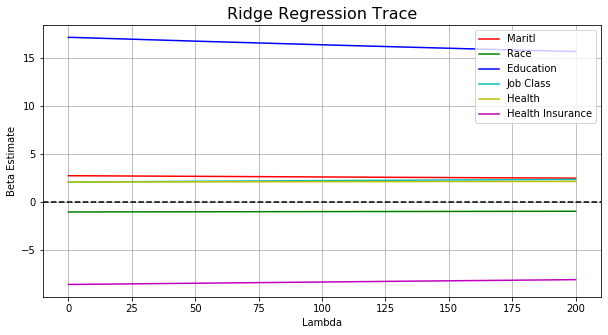

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

feature_names =['maritl', 'race', 'education','jobclass','health','health_ins']


data = preprocessing.scale(df[feature_names])
X_train, X_test, y_train, y_test = train_test_split(data, df.wage, test_size=0.3, random_state=10)

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

print(pd.DataFrame({'variable': feature_names, 'estimate': ols_reg.coef_}))




ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': ['maritl', 'race', 'education','jobclass','health','health_ins'], 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0, 200, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.maritl, 'r', ridge_df.race, 'g', ridge_df.education, 'b', ridge_df.jobclass, 'c', ridge_df.health, 'y', ridge_df.health_ins, 'm')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Maritl','Race','Education','Job Class','Health','Health Insurance'])
ax.grid(True)


Text(0, 0.5, 'MSE')

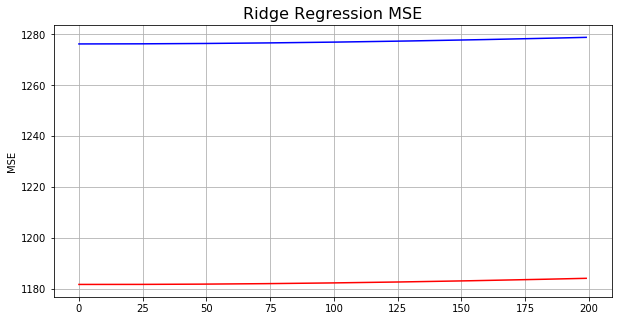

In [24]:
# MSE of training set
ridge_mse_train = [mean_squared_error(y_train, p) for p in ridge_train_pred]

# MSE of test set
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]


fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams['axes.grid'] = True
ax.plot(ridge_mse_train, 'b', ridge_mse_test, 'r')
ax.set_title("Ridge Regression MSE", fontsize=16)
ax.set_ylabel("MSE")